# **LGMVIP TASK 3  Prediction using Decision Tree Algorithm**

# **By:Amber Mishra**

# **Importing necessary libraries**

In [ ]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size:18px;
</style>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt # seaborn is bases on matplot
sns.set(color_codes=True) # adds a nice background
%matplotlib inline # tells python to actually display the graphs
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

UsageError: unrecognized arguments: # tells python to actually display the graphs


# **Importing The Dataset**

In [ ]:
Data = pd.read_csv('Iris.csv')
Data.shape

(150, 6)

## Reading the dataset

In [ ]:
Data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Performing EDA**

In [ ]:
Data.shape

(150, 6)

In [ ]:
Data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
# checking for null values
Data.isnull().values.any()

False

In [ ]:
Data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
Data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# **Visualization**

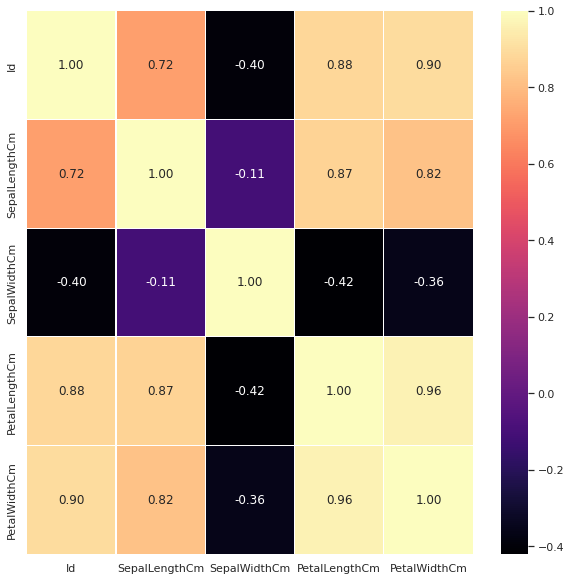

In [ ]:
# heat map for correlation
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(Data.corr(),ax=ax, annot=True,linewidths=0.05, fmt = '.2f', cmap="magma")
plt.show()

# conclusion :
# overall the data is higly correlated
# petalLength and SepalLength are highly correlated
# petalLength and petalWidth are highly correlated
# sepalLength and sepalWidth are poorly correlated
# sepalWidth and petalLength are very poorly correlated

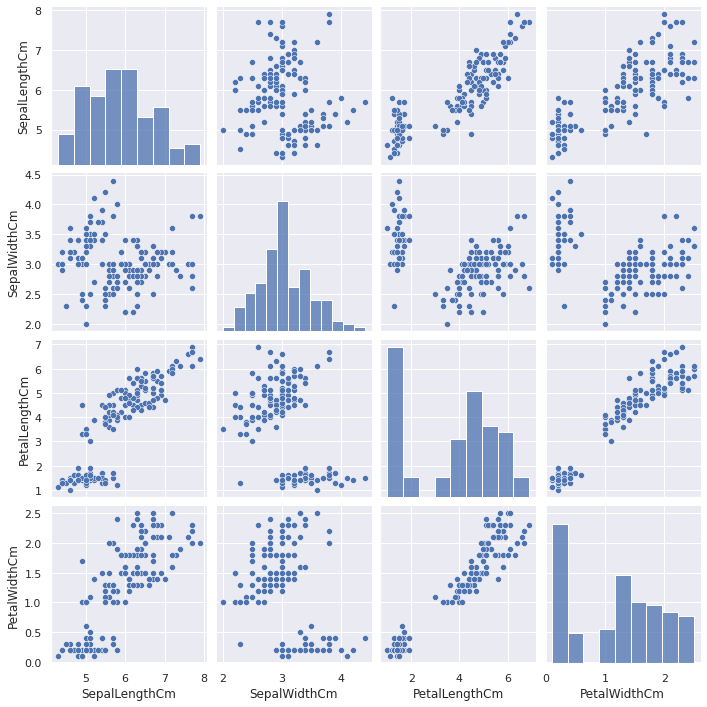

In [ ]:
# pairplot
sns.pairplot(Data.iloc[:,1:])

In [ ]:
# check the skewness
Data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [ ]:
# dublicates
dupes = Data.duplicated()
dupes
# there are no duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

<Figure size 1152x432 with 0 Axes>

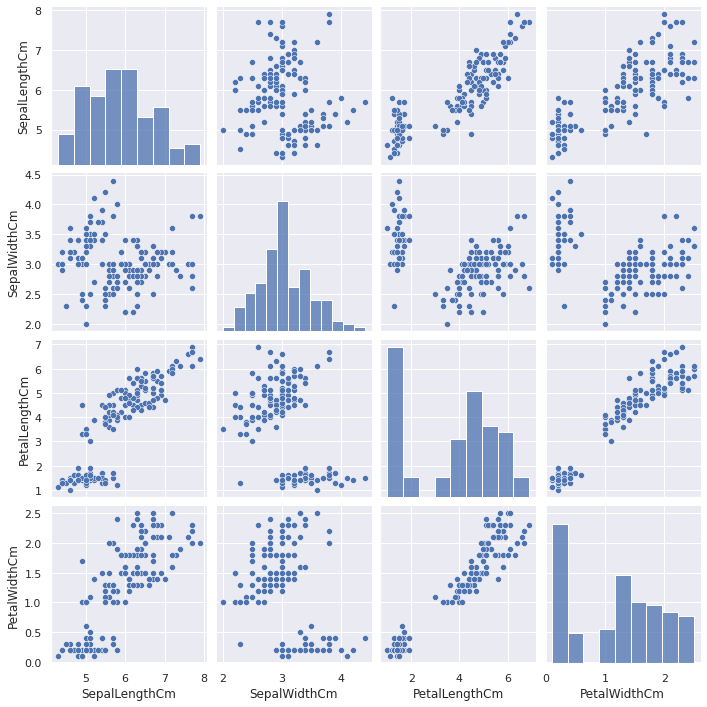

In [ ]:
plt.figure(figsize=(16,6))
sns.pairplot(Data.iloc[:,1:])

# **observation**

1. petal length is rightly skiwed

2. petal width is also rightly skewed

3. sepal length and sepal width are normally distributed

4. there is a linear pair relationship b/w petal width and petal length

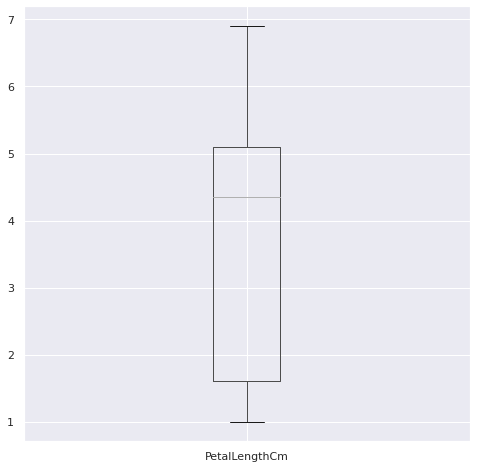

In [ ]:
# boxplot
Data.boxplot(column='PetalLengthCm',figsize=(8,8))

# **conclusion**

### Q1 = 1.7

### Q2 = 4.4

### Q3 = 5

In [ ]:
# check measure of dispersion
Data.quantile(0.75)- Data.quantile(0.25)

Id               74.5
SepalLengthCm     1.3
SepalWidthCm      0.5
PetalLengthCm     3.5
PetalWidthCm      1.5
dtype: float64

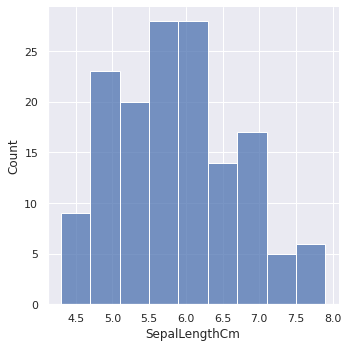

In [ ]:
sns.displot(Data['SepalLengthCm'])

# **Univariate and Bivariate plots**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23b8560910>,
      dtype=object)

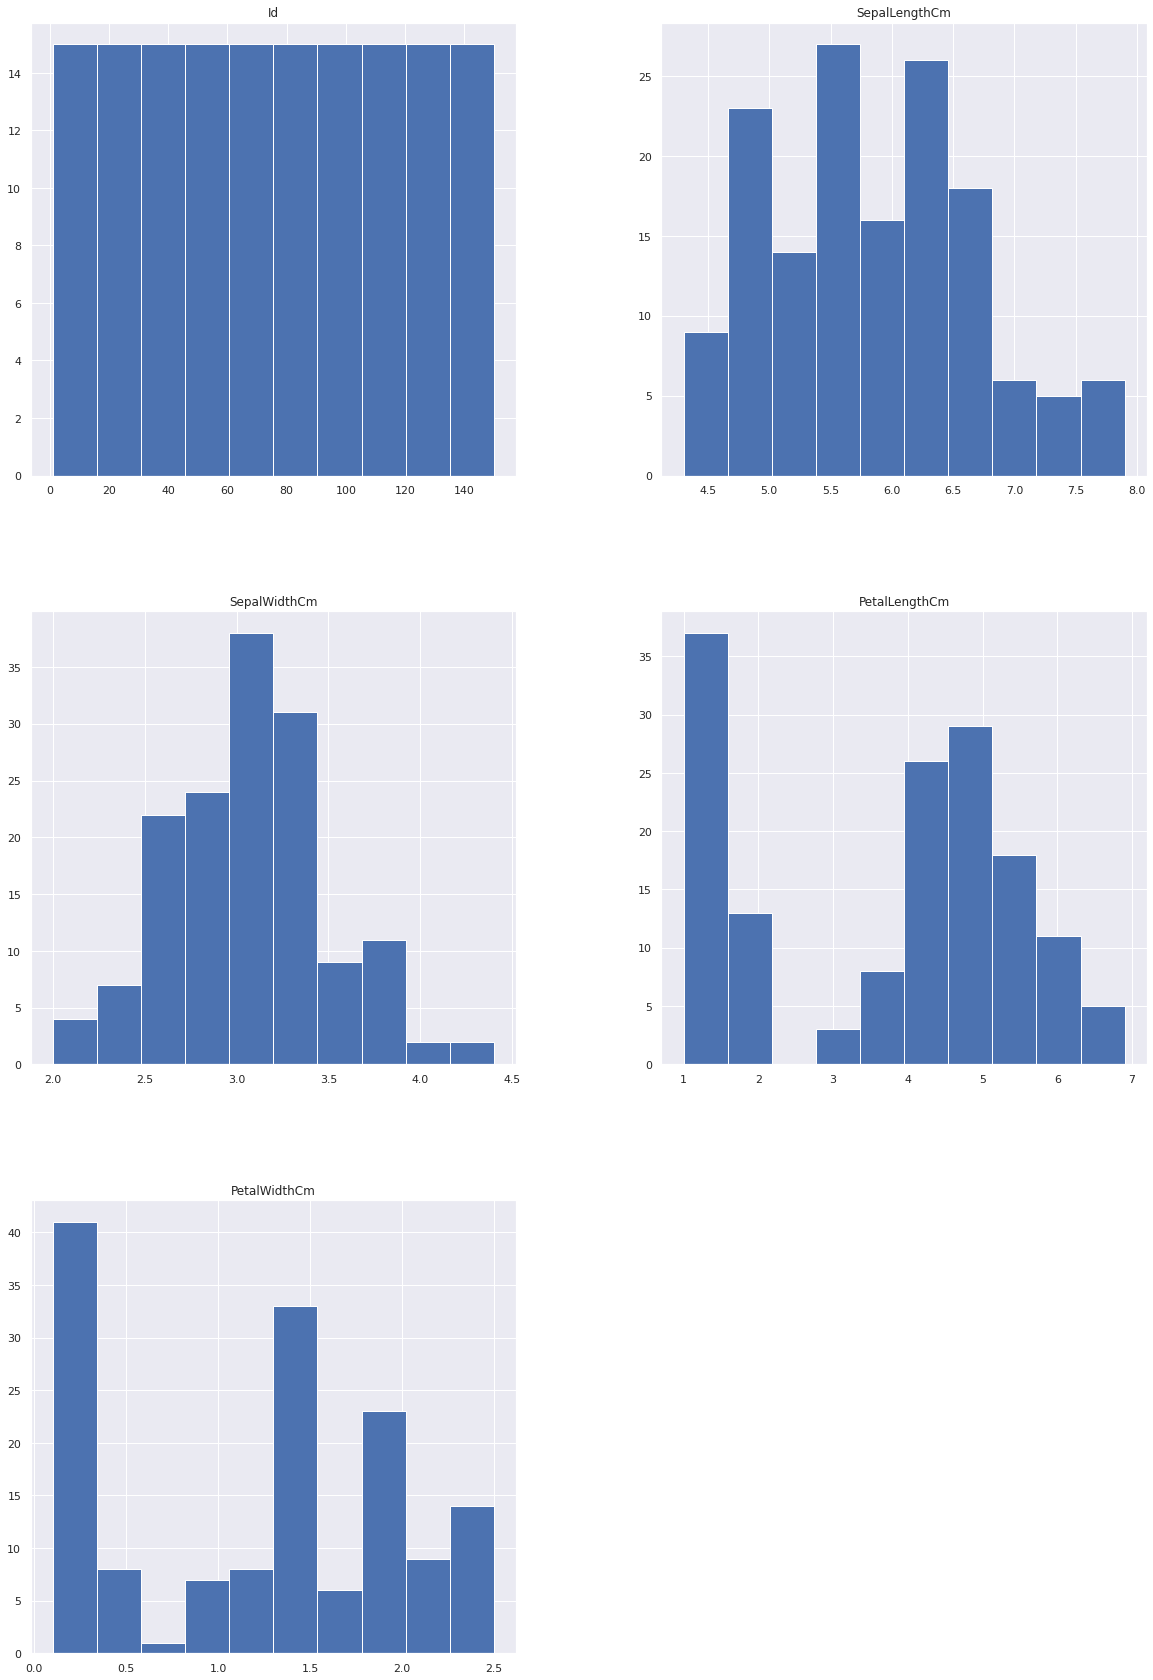

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Data.hist(figsize=(20,30))

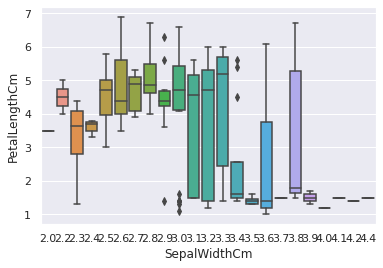

In [ ]:
import seaborn as sns

sns.boxplot(x="SepalWidthCm", y="PetalLengthCm", data=Data)

In [ ]:
pd.crosstab(Data['SepalWidthCm'],Data['PetalLengthCm'] )

PetalLengthCm,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.9,3.0,...,5.7,5.8,5.9,6.0,6.1,6.3,6.4,6.6,6.7,6.9
SepalWidthCm,,,,,,,,,,,,,,,,,,,,,
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.5,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2.9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


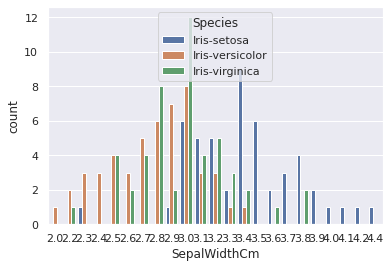

In [ ]:
sns.countplot(x="SepalWidthCm", hue="Species", data=Data)

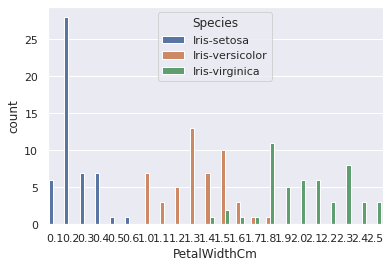

In [ ]:
sns.countplot(x="PetalWidthCm", hue="Species", data=Data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


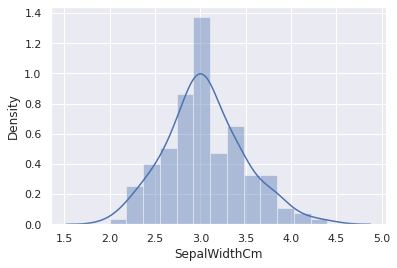

In [ ]:
sns.distplot(Data['SepalWidthCm'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


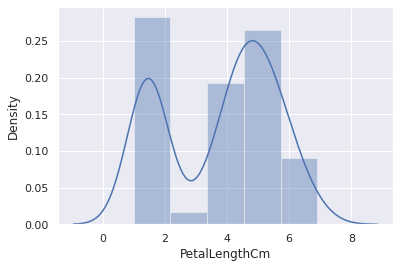

In [ ]:
sns.distplot(Data['PetalLengthCm'])

# **Decision Tree**

In [ ]:
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
Data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
x = Data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = Data['Species'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=1)

In [ ]:
# Build Decision tree Model 
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# scorring our decision tree

print(dTree.score(x_test,y_test))

0.9555555555555556


# **Accuracy = 95%**

In [ ]:
y_pred = dTree.predict(x_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']


# **Visualizing the Tree**

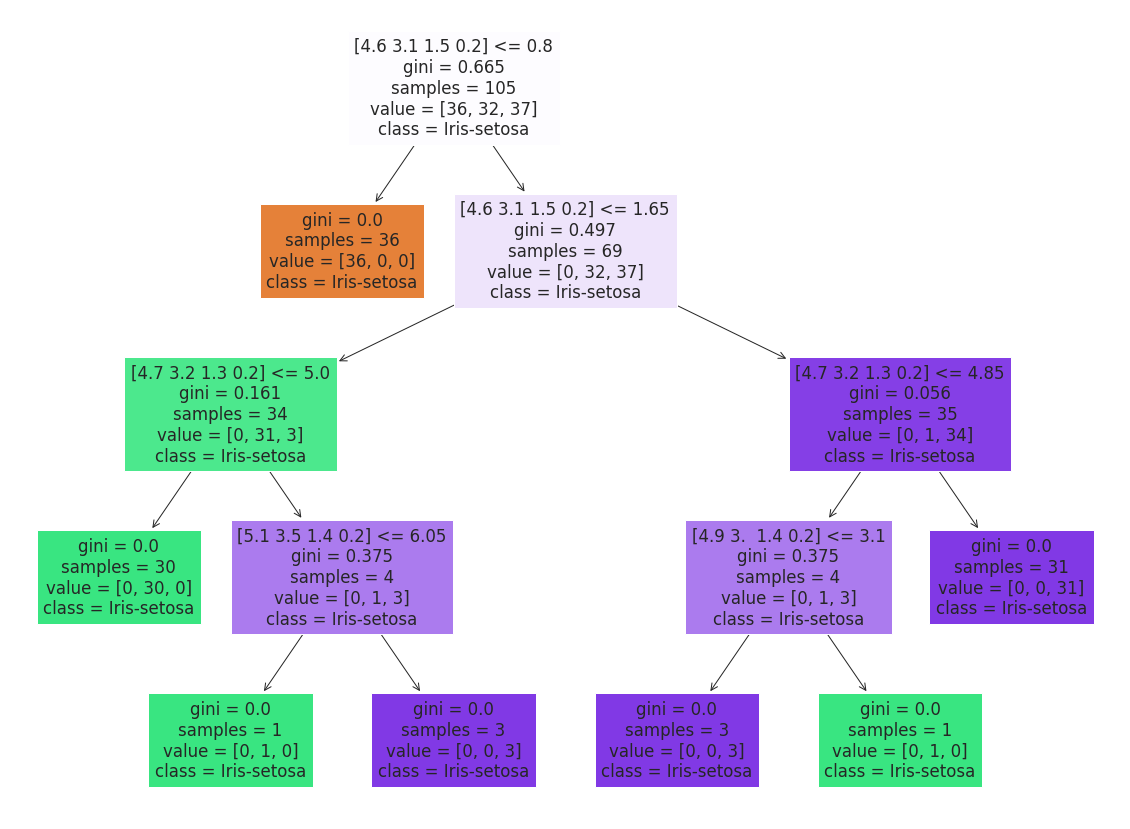

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(dTree, 
                   feature_names=x,  
                   class_names=y,
                   filled=True)